In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Grover's Search

## Intro to problem
You have likely heard that one of the many advantages a quantum computer has over a classical computer is its superior speed searching databases. Grover’s algorithm demonstrates this capability. This algorithm can speed up an unstructured search problem quadratically.
Suppose you are given a large list of N items. Among these items is one item with a unique property that we wish to locate. We will call this one the winner, $\omega$. 
Using classical computation, one would have to check on average N/2 of these boxes, and in the worst case, all N of them. On a quantum computer, however, we can find the marked item in roughly $$\sqrt{N}$$ steps with Grover’s search.
How does Grover's search do this?
Grover’s algorithm solves oracles that add a negative phase to the solution states. That is, for any state $|x\rangle$ in the computational basis:

$$\begin{aligned}U_\omega|x\rangle = \displaystyle \Bigg\{{\quad |x\rangle \quad if \neq \omega \\  -|x\rangle \quad if = \omega}\end{aligned}$$
This oracle will be a diagonal matrix, where the entries that correspond to the marked item will have a negative phase.

$$U_\omega = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$$

In the matrix above 100 & 101 have both been marked.

Let's say we have a register of qubits that we know contain our desired answer. We can add another qubit that will only be used in constructing our answer (called an ancilla qubit) initialized in a $$|-\rangle$$ state. This qubit will then be used to [kickback](https://qiskit.org/textbook/ch-gates/phase-kickback.html) it's phase to the basis state that we want to find. Following this we will use amplitude amplification to amplify the basis states that have a $$|-\rangle$$ phase.

Amplitude amplification stretches out (amplifies) the amplitude of the marked item, which shrinks the other items’ amplitudes, so that measuring the final state will return the right item with near certainty.

The first step involves creating your basis states. The basis state we want amplified has been marked in red
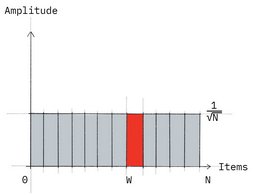

We then apply the oracle and assign a $$|-\rangle$$ phase to the basis states we are looking for
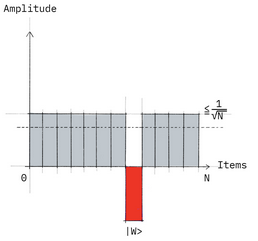

Finally we apply our amplitude amplification which is called a diffuser to boosts the negative amplitude to roughly three times its original value, while it decreases the other amplitudes.
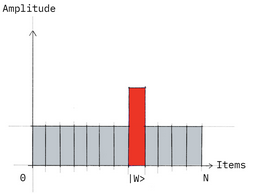
We then go to Step 2 to repeat the application. This procedure will be repeated several times to focus in on the winner.

How many times do we need to apply the rotation? It turns out that roughly $$\sqrt{N}$$ rotations suffice. This becomes clear when looking at the amplitudes of the state $$|\psi\rangle$$. We can see that the amplitude of $$|\omega\rangle$$grows linearly with the number of applications. However, since we are dealing with amplitudes and not probabilities, the vector space’s dimension enters as a square root. Therefore, it is the amplitude, and not just the probability, that is being amplified in this procedure.

## Problem lab description
Your task for this lab will be to solve a 2x2 binary sudoku puzzle using Grover's algorithm. You will design a oracle circuit to apply a negative phase to the possible solutions contained in a equal superposition. Then you will use a diffuser to amplify the marked items amplitude before measuring the quantum state to find your answers to the puzzle. Your answer will be a histogram containing the output of your quantum circuit which displays the answer to the binary sudoku problem.

Here are some links if you get stuck:<br>
[1] - [Grover's Algorithm](https://quantum-computing.ibm.com/composer/docs/iqx/guide/grovers-algorithm) <br>
[2] - [Grover's Algorithm Qiskit Docs](https://qiskit.org/textbook/ch-algorithms/grover.html#3qubits-simulation)


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

sudoku_qubits = QuantumRegister(4, name='s')
oracle_qubits = QuantumRegister(4, name='o')
negative_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(sudoku_qubits, oracle_qubits, negative_qubit, cbits)

# Initialize 'negative0' in state |->
qc.initialize(???, negative_qubit)
